<a href="https://colab.research.google.com/github/vansh123321/Projects/blob/master/Border_Crossing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://psmag.com/.image/c_limit%2Ccs_srgb%2Cq_auto:good%2Cw_700/MTYzMDg5MTM3MDQwMTA3Mjgx/gettyimages-1139518324.webp)

# **We are having a lot of data for border crossing. In this notebook we analyse and try to give ansers of many questions like which border is more busy, how people cross borders and many other, If you like this notebook hit upvote **

In [13]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import datetime
from datetime import date, timedelta
from sklearn.cluster import KMeans
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [14]:
!pip install kaggle

In [15]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"vanshjatana","key":"c38bd2c70d585ec85deaead606a1d1cd"}'}

In [16]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [17]:
!kaggle datasets download -d divyansh22/us-border-crossing-data

us-border-crossing-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [18]:
from zipfile import ZipFile
file_name = "us-border-crossing-data.zip"
with ZipFile(file_name,'r') as zp:
  zp.extractall()
  print('done')

done


# How Data look like?

In [19]:
data = pd.read_csv("/content/Border_Crossing_Entry_Data.csv")
data = data.drop("Port Code",axis=1)
data = data.rename(columns={"Port Name":"state","State":"code","Border":"border","Date":"date","Value":"count","Measure":"measure"})
data['date'] = pd.to_datetime(data['date']).dt.normalize()
data = data.replace({"Train Passengers":"Train","Rail Containers Full":"Train","Rail Containers Empty":"Train","Trains":"Train","Bus Passengers":"Bus","Buses":"Bus","Trucks":"Truck","Truck Containers Full":"Truck","Truck Containers Empty":"Truck","Personal Vehicles":"Personal_vehicle","Personal Vehicle Passengers":"Personal_vehicle"})
data.head()

,state,code,border,date,measure,count
0,Alcan,AK,US-Canada Border,2020-02-01,Personal_vehicle,1414
1,Alcan,AK,US-Canada Border,2020-02-01,Personal_vehicle,763
2,Alcan,AK,US-Canada Border,2020-02-01,Truck,412
3,Alcan,AK,US-Canada Border,2020-02-01,Truck,122
4,Alcan,AK,US-Canada Border,2020-02-01,Truck,545


# Which border has more crossing??

In [20]:
gbb =  data.groupby("border")[["count"]].sum().reset_index()
fig = px.pie(gbb,
             values="count",
             names="border",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

**By this plot we can easily say that US-Mexico border is more busy border in United States**

# What is trend of crossing border??

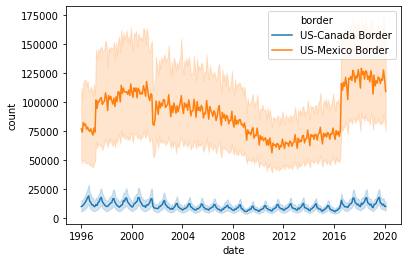

In [21]:
sns.lineplot(data=data, x='date',y='count', hue='border')


# What are the ways of crossing border??

In [22]:
gbm =  data.groupby("measure")[["count"]].sum().reset_index()
fig = px.pie(gbm,
             values="count",
             names="measure",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

**Personal Vehicles are mostly  used by people to cross the border followed by Pedestrains and Trucks**

# What is trend of ways of crossing border

In [ ]:
sns.lineplot(data=data, x='date',y='count', hue='measure')


# What are the ways of crossing border (State-Level)??

In [ ]:

fig = px.sunburst(data, path=['border','code','measure'], values='count',
                  color='code', hover_data=['measure'],
                 )
fig.show()

# Which State has more Crossing??

In [ ]:
gbs =  data.groupby(["date","state"])[["count"]].sum().reset_index()
fig = px.treemap(gbs, path=['state'], values='count',
                  color='count', hover_data=['state'],
                  color_continuous_scale='burgyl')
fig.show()

**This graph show the state where crossing of border happen. Color and Size are by count. El-Paso and San Ysidro are the most busiest state where crossing done**

In [ ]:
map_data = data.loc[:,["date","code","count"]]
map_data1 = data.loc[:,["code","count"]]
map_data=map_data.groupby(["date","code"])[["count"]].sum().reset_index()
map_data1=map_data.groupby(["code"])[["count"]].sum().reset_index()


# Map of Total Border Crossing 

In [ ]:
fig = px.choropleth(map_data1, locations=map_data1["code"],       

 color=map_data1["count"],
                    locationmode="USA-states",
                    scope="usa",
                    color_continuous_scale='Reds',
                    hover_data = [map_data1.count],
                   )

fig.show()

**The US map shows the most busy border, Darker color show the high amount of crossing. As it is clearly visible that Texas is Dark means mostly people use Texas for crossing border, which is US-Mexico border**

#  Map of Monthly Border Crossing 

In [ ]:
cdf=map_data
cdf["date"] = cdf["date"].astype(str)
fig = px.choropleth(cdf, locations=cdf["code"],       

 color=cdf["count"],
                    locationmode="USA-states",
                    scope="usa",
                    animation_frame=cdf["date"],

                    color_continuous_scale='Reds',
                    hover_data = [cdf.count],
                   )

fig.show()

**This map show the border crossing on monthly basis (only US states)**

# **How many person cross border in month??**

In [ ]:
gbdt = data.groupby("date")[["count"]].sum().reset_index()
gbdt = gbdt.tail(24)

fig = px.bar(gbdt[['date', 'count']], 
             y="count", x="date", color='date', 
             log_y=True)
fig.show()

**This map show the border crossing on monthly basis for all the borders**